In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns

In [2]:
# Ebola 데이터 읽기
ebola = pd.read_csv('data/ebola_2014-2016.csv')

In [3]:
# Ebola의 Date 컬럼을 datetime 타입으로 변경
ebola.Date = pd.to_datetime(ebola['Date'], format='%Y-%m-%d')

In [4]:
# 데이터를 2014, 2015, 2016으로 나누기
mask_2014 = (ebola['Date'] >= '2014-01-01') & (ebola['Date'] <= '2014-12-31')
mask_2015 = (ebola['Date'] >= '2015-01-01') & (ebola['Date'] <= '2015-12-31')
mask_2016 = (ebola['Date'] >= '2016-01-01') & (ebola['Date'] <= '2016-12-31')

In [5]:
ebola2014 = ebola.loc[mask_2014]
ebola2015 = ebola.loc[mask_2015]
ebola2016 = ebola.loc[mask_2016]

In [17]:
# 2015, 2016년 데이터를 상 하반기로 나누기. ( 2014년 데이터는 하반기부터 시작됨. 2016년 데이터는 하반기가 없음. )
mask_2015_first = (ebola2015['Date'] >= '2015-01-01') & (ebola2015['Date'] <= '2015-06-30')
mask_2015_second = (ebola2015['Date'] >= '2015-07-01') & (ebola2015['Date'] <= '2015-12-31')

mask_2016 = (ebola2016['Date'] >= '2016-01-01') & (ebola2016['Date'] <= '2016-06-30')

In [18]:
"""
데이터셋
    ebola2014
    ebola2015_first, ebola2015_second
    ebola2016_first, ebola2016_second
"""
ebola2015_first = ebola2015.loc[mask_2015_first]
ebola2015_second = ebola2015.loc[mask_2015_second]

ebola2016 = ebola2016.loc[mask_2016]

In [21]:
ebola2014_cases = ebola2014.Cases.sum()
ebola2014_deaths = ebola2014.Deaths.sum()

ebola2015_first_cases = ebola2015_first.Cases.sum()
ebola2015_first_deaths = ebola2015_first.Deaths.sum()
ebola2015_second_cases = ebola2015_second.Cases.sum()
ebola2015_second_deaths = ebola2015_second.Deaths.sum()

ebola2016_cases = ebola2016.Cases.sum()
ebola2016_deaths = ebola2016.Deaths.sum()

In [32]:
ebola_dataset = pd.DataFrame(
    data= {
        'Cases': [ebola2014_cases, ebola2015_first_cases, ebola2015_second_cases, ebola2016_cases],
        'Deaths': [ebola2014_deaths, ebola2015_first_deaths, ebola2015_second_deaths, ebola2016_deaths]
    },

    index= ['2014', '2015_first', '2015_second', '2016'],
    columns= ['Cases', 'Deaths']
)

In [33]:
ebola_dataset

,Cases,Deaths
2014,470337.0,188461.0
2015_first,2836740.0,1157729.0
2015_second,2989743.0,1197935.0
2016,28642.0,11319.0


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

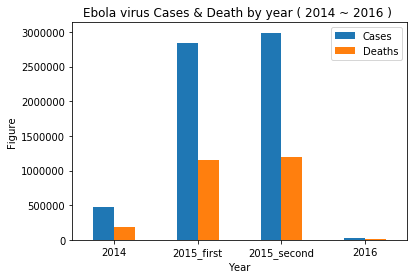

In [43]:
ebola_dataset.plot(kind='bar')
plt.title('Ebola virus Cases & Death by year ( 2014 ~ 2016 ) ')
plt.xlabel('Year')
plt.ylabel('Figure')
plt.xticks(rotation=0, horizontalalignment='center')